# Vanishing Point Map

This notebook is dedicated to the visualization of estimated vanishing points within the scenes. By overlaying the vanishing points on the actual images, we aim to gain a clearer understanding of how the structural organization of the scenes is defined.

In [141]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
import sys

sys.path.append("../")

import os
import cv2
from tqdm import tqdm
from pathlib import Path
from justpfm import justpfm
import matplotlib.pyplot as plt

from src.utils.file import get_files_recursive, get_ids_from_file_path, get_session_str
from src.config import IMAGES_PATH, VANISHING_POINT_MAP_PFM_PATH, VANISHING_POINT_MAP_VIZ_PATH

In [143]:
if not os.path.exists(VANISHING_POINT_MAP_PFM_PATH):
    print(f"❌ {Path(VANISHING_POINT_MAP_PFM_PATH).resolve()} does not exist. Please run the vanishing point estimation script first.")
else:
    print(f"✅ You are good to go!")

✅ You are good to go!


In [144]:
def plot_vanishing_point_visualization(experiment_id: int, session_id: int, sequence_id: int) -> None:
    """
    Plot vanishing point visualization for a given experiment, session and sequence.

    Args:
        experiment_id (int): The experiment ID.
        session_id (int): The session ID.
        sequence_id (int): The sequence ID.
    """
    session_str = get_session_str(experiment_id, session_id)
    # Get image and vanishing point map
    image_file_path = f"{IMAGES_PATH}/experiment{experiment_id}/{session_str}/scene{sequence_id}.png"
    image = cv2.imread(image_file_path)
    vanishing_point_map_file_path = f"{VANISHING_POINT_MAP_PFM_PATH}/experiment{experiment_id}/{session_str}/scene{sequence_id}.pfm"
    vanishing_point_map = justpfm.read_pfm(file_name=vanishing_point_map_file_path)
    vanishing_point_map = cv2.normalize(vanishing_point_map, None, 0, 1, cv2.NORM_MINMAX)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 3))
    plt.imshow(image)
    plt.imshow(vanishing_point_map, alpha=0.5, cmap="inferno")
    plt.axis("off")
    plt.colorbar(label="Vanishing Point")
    plt.title(f"Vanishing Point Visualization for Experiment {experiment_id} Session {session_id} Sequence {sequence_id}")
    plt.tight_layout()
    plt.show()


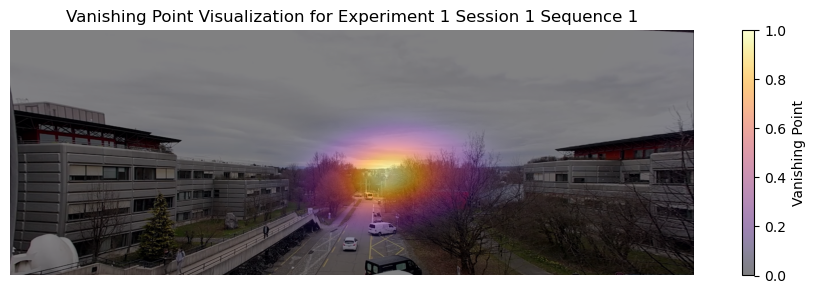

In [145]:
plot_vanishing_point_visualization(
    experiment_id=1,
    session_id=1,
    sequence_id=1
)

In [146]:
def save_vanishing_point_visualizations() -> None:
    """
    Save vanishing point visualizations for all experiments, sessions and sequences.
    """
    image_file_paths = get_files_recursive(IMAGES_PATH, "*.png")
    image_file_paths = sorted(image_file_paths)
    vanishing_point_file_paths = get_files_recursive(VANISHING_POINT_MAP_PFM_PATH, "*.pfm")
    vanishing_point_file_paths = sorted(vanishing_point_file_paths)

    for image_file_path, vanishing_point_file_path in tqdm(zip(image_file_paths, vanishing_point_file_paths), total=len(image_file_paths), desc="⌛ Saving vanishing point visualizations..."):
        # Get image and vanishing point map
        image = cv2.imread(image_file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        vanishing_point = justpfm.read_pfm(file_name=vanishing_point_file_path)
        vanishing_point = cv2.normalize(vanishing_point, None, 0, 1, cv2.NORM_MINMAX)

        # Get visualization file path
        experiment_id, session_id, sequence_id = get_ids_from_file_path(image_file_path)
        session_str = get_session_str(experiment_id, session_id)
        visualization_file_path = f"{VANISHING_POINT_MAP_VIZ_PATH}/experiment{experiment_id}/{session_str}/scene{sequence_id}.png"

        # Plot and save vanishing point visualization
        os.makedirs(os.path.dirname(visualization_file_path), exist_ok=True)
        plt.figure(figsize=(10, 3))
        plt.imshow(image)
        plt.imshow(vanishing_point, alpha=0.5, cmap="inferno")
        plt.axis("off")
        plt.colorbar(label="Vanishing Point")
        plt.title(f"Vanishing Point Visualization for Experiment {experiment_id} Session {session_id} Sequence {sequence_id}")
        plt.tight_layout()
        plt.savefig(visualization_file_path)
        plt.close()

    print(f"✅ Vanishing point visualizations saved to {Path(VANISHING_POINT_MAP_VIZ_PATH).resolve()}")

In [147]:
save_vanishing_point_visualizations()

⌛ Saving vanishing point visualizations...: 100%|██████████| 50/50 [00:16<00:00,  2.98it/s]

✅ Vanishing point visualizations saved to C:\Users\arnau\cours\master_project\git\generated\vanishing_point\viz
